In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import AdaBoostClassifier

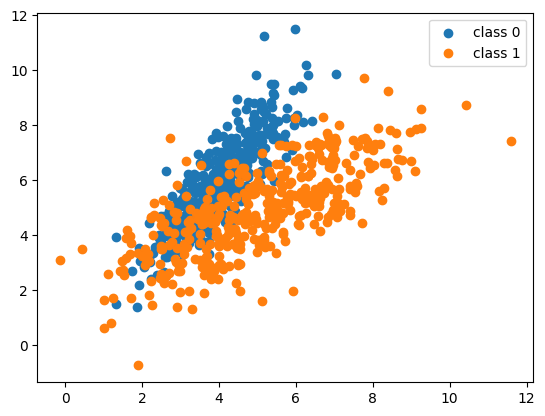

In [58]:
test_data = pd.read_csv('Dataset.csv', names=['x', 'y', 'target'])
c_0 = test_data[test_data['target'] == 0]
c_1 = test_data[test_data['target'] == 1]

plt.scatter(c_0['x'], c_0['y'])
plt.scatter(c_1['x'], c_1['y'])
plt.legend(['class 0', 'class 1'])
plt.show()

X_test, y_test = test_data[['x', 'y']], test_data[['target']]
test_data = test_data.to_numpy()

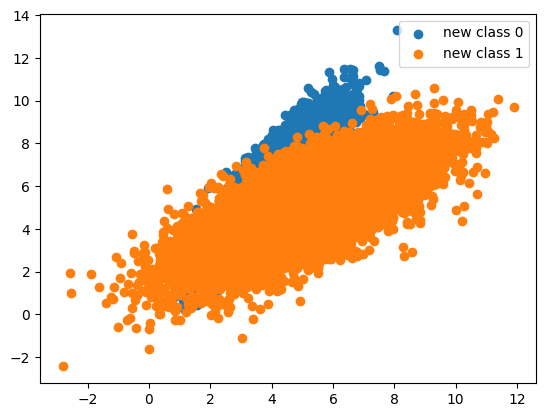

In [59]:
coord = ['x', 'y']
sz=10000

n_c_0 = np.random.multivariate_normal(c_0[coord].mean(), c_0[coord].cov(), size=sz)
n_c_1 = np.random.multivariate_normal(c_1[coord].mean(), c_1[coord].cov(), size=sz)

n_c_0 = np.c_[ n_c_0, np.zeros(sz) ]
n_c_1 = np.c_[ n_c_1, np.ones(sz) ]

train_data = np.vstack((n_c_0, n_c_1))

plt.scatter(n_c_0[:, 0], n_c_0[:, 1])
plt.scatter(n_c_1[:, 0], n_c_1[:, 1])
plt.legend(['new class 0', 'new class 1'])
plt.show()

In [60]:
X_train, y_train = train_data[:, [0, 1]], train_data[:, -1]
X_test, y_test = test_data[:, [0, 1]], test_data[:, -1]

In [61]:
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_train,
#                               X_test,
#                               y_train,
#                               y_test) 

# print(models)

In [62]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.83985